# Indexation Web - TP1
BERNARD Renan

## Introduction

Tout d'abord les différentes importations nécessaires pour ce Notebook.
Les fonctions utilisées sont dans le fichier __utils.py__.

In [197]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of utils failed: Traceback (most recent call last):
  File "/home/renan/anaconda3/envs/main/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/renan/anaconda3/envs/main/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/home/renan/anaconda3/envs/main/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/renan/anaconda3/envs/main/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
 

In [209]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from functools import reduce
import multiprocessing

from utils import *

[nltk_data] Downloading package stopwords to /home/renan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Récupérons ensuite l'ensemble des données. Nous garderons un DataFrame contenons le texte, l'auteur et l'identifiant du document.

In [126]:
%%time
texts = generate_texts_dataframe()
texts.head()

CPU times: user 86.9 ms, sys: 20 ms, total: 107 ms
Wall time: 107 ms


,Text,Author,DocumentId
0,"Russia's Fuel and Energy Ministry, sitting on ...",Lynnley Browning,116673
1,Russia's Western oil joint ventures are findin...,Lynnley Browning,248885
2,Russian oil company officials said on Friday t...,Lynnley Browning,314644
3,Azerbaijan is proving more successful in attra...,Lynnley Browning,219830
4,A multinational group trying to build a $1.5 b...,Lynnley Browning,239689


Lisons un article :

In [127]:
view_article(1380, texts)


--------------------------------------------
Author : William Kazer
Id : 209813
--------------------------------------------
Russia will push to expand economic ties with China at a top level meeting in Moscow next month as old political hostilities fade in the background, a senior Russian diplomat said on Friday.
"The big task in bilateral relations is to boost economic cooperation to the level of political cooperation," said Russian Ambassador Igor Rogachev.
Chinese Premier Li Peng and Russian Prime Minister Viktor Chernomyrdin will meet in Moscow to map out practical economic steps in a relationship described by the two sides as a strategic partnership.
The two former rivals for the leadership of the world communist movement have not seen such smooth relations since 1949 -- when the Chinese communists proclaimed the birth of the People's Republic of China, according to the Russian diplomat.
"Relations have never been on such a healthy and rational basis," said Rogachev, one of Russ

## Préparation des Textes - _Tokenization_

Le premier traitement est la transformation des phrases en une liste de mots contenant uniquement des caractères alphabétiques minuscules extraits à l'aide d'une expression régulière.

On enlève ensuite les 'stopWords' (_the_, _a_, _or_,...) qui n'apportent pas d'information sur le contenu de l'article.

Puis on a choisi d'utiliser un __stemmer__ pour transformer les mots en _tokens_. Cette méthode enlève les préfixes et suffixes des mots pour garder uniquement la racine. Celle-ci n'est pas forcement un mot qui existe réellement comme _ministri_, mais capte l'ensemble des mots "proches".

C'est la fonction __tokenize_text__ qui fait cette étape. Elle est présente dans __utils.py__.

La suite du traitement de texte se fera via ces listes de _tokens_.

## Indexation

### Création de l'Index

Afin de trouver rapidement les documents qui contiennent un certain _token_, nous créons un index. On a choisi de faire un index de la forme suivante :

In [ ]:
{"token1" : {"total_occurences" : 4,
             article1 : {"locations" : [12, 13, 14],
                         "occurences" : 3},
             article2 : {"locations" : [9],
                         "occurences" : 1}}}

La création de l'index pour un seul texte se fait via la fonction __create_index_from_text__. Celle-ci procède via une itération sur la liste de _tokens_ correspondant au texte pour ensuite enregistrer le nombre d'occurences des _tokens_ dans un index selon le modèle précédent.

La création de l'index final se fait alors en "additionant" les différents index via la foncion __sum_two_indexes__.
                               
Tout d'abord, regardons le temps d'exécution et le résultat via une itération sur l'ensemble des documents :

In [5]:
%%time
index = create_index_from_text(texts.Text[0], 0)
for i in range(1, len(texts)):
    index_i = create_index_from_text(texts.Text[i], i)
    index = sum_two_indexes(index, index_i)

CPU times: user 13.2 s, sys: 84 ms, total: 13.3 s
Wall time: 13.3 s


In [9]:
index['ministri']

{'total_occurences': 361,
 0: {'locations': [3, 64, 104, 146, 154, 197, 228, 315, 344, 352],
  'occurences': 10},
 2: {'locations': [91, 108], 'occurences': 2},
 3: {'locations': [228, 245], 'occurences': 2},
 7: {'locations': [142], 'occurences': 1},
 12: {'locations': [212], 'occurences': 1},
 13: {'locations': [2, 35, 60], 'occurences': 3},
 14: {'locations': [170, 269], 'occurences': 2},
 16: {'locations': [212, 295], 'occurences': 2},
 23: {'locations': [11, 55, 200, 203, 250], 'occurences': 5},
 25: {'locations': [233, 296, 311, 329], 'occurences': 4},
 26: {'locations': [142], 'occurences': 1},
 32: {'locations': [329], 'occurences': 1},
 33: {'locations': [115], 'occurences': 1},
 37: {'locations': [130, 228, 311], 'occurences': 3},
 41: {'locations': [30, 65, 77], 'occurences': 3},
 45: {'locations': [98], 'occurences': 1},
 46: {'locations': [226, 244], 'occurences': 2},
 47: {'locations': [130], 'occurences': 1},
 48: {'locations': [129], 'occurences': 1},
 82: {'locations':

Maintenant essayons avec l'architecture __MapReduce__, le _mapper_ correspondant à la création de l'index sur un seul text, le _reducer_ correspondant à la somme de deux index.

In [128]:
%%time 
def mapper(x):
    return create_index_from_text(texts.Text[x], x)

with multiprocessing.Pool(processes=4) as pool:
        results = pool.map(mapper, range(len(texts)))
        
index = reduce(sum_two_indexes, list(results))

CPU times: user 4.37 s, sys: 362 ms, total: 4.73 s
Wall time: 13.3 s


In [129]:
index['ministri']

{'total_occurences': 361,
 0: {'locations': [3, 64, 104, 146, 154, 197, 228, 315, 344, 352],
  'occurences': 10},
 2: {'locations': [91, 108], 'occurences': 2},
 3: {'locations': [228, 245], 'occurences': 2},
 7: {'locations': [142], 'occurences': 1},
 12: {'locations': [212], 'occurences': 1},
 13: {'locations': [2, 35, 60], 'occurences': 3},
 14: {'locations': [170, 269], 'occurences': 2},
 16: {'locations': [212, 295], 'occurences': 2},
 23: {'locations': [11, 55, 200, 203, 250], 'occurences': 5},
 25: {'locations': [233, 296, 311, 329], 'occurences': 4},
 26: {'locations': [142], 'occurences': 1},
 32: {'locations': [329], 'occurences': 1},
 33: {'locations': [115], 'occurences': 1},
 37: {'locations': [130, 228, 311], 'occurences': 3},
 41: {'locations': [30, 65, 77], 'occurences': 3},
 45: {'locations': [98], 'occurences': 1},
 46: {'locations': [226, 244], 'occurences': 2},
 47: {'locations': [130], 'occurences': 1},
 48: {'locations': [129], 'occurences': 1},
 82: {'locations':

Les résultats sont heureusement les mêmes, mais l'utilisation de __map__ et __reduce__ divise par quasiment 2 le temps de calcul (en fonction de la RAM de la machine, on peut augmenter le nombre de _processes_).

### Etude du Vocabulaire

In [130]:
%%time

def mapper(token):
    return {"Token" : token, "Occurences" : index[token]["total_occurences"]}

with multiprocessing.Pool(processes=4) as pool:
        results = pool.map(mapper, list(index.keys()))
        
df_vocabulary = pd.DataFrame(list(results)).sort_values("Occurences", ascending=False)

CPU times: user 119 ms, sys: 326 ms, total: 445 ms
Wall time: 614 ms


In [131]:
df_vocabulary.head()

,Token,Occurences
17,said,19856
277,year,7025
79,compani,5658
304,percent,5296
375,would,5202


Le _token_ le plus utilisé dans le corpus est __said__, puis __year__. Ces mots auraient pû être considérés comme des __stopWords__ (non-porteurs de sens) vu leur frquence.

La loi de __Zipf__ est-elle vérifiée dans notre corpus ?

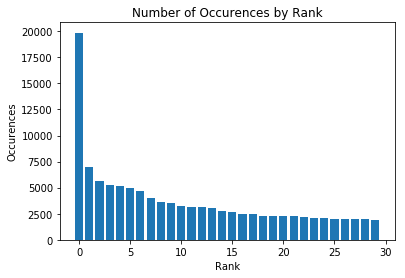

In [132]:
plt.bar(x=range(30), height=df_vocabulary.Occurences[:30])
plt.xlabel("Rank")
plt.ylabel("Occurences")
plt.title("Number of Occurences by Rank")
plt.show()

On peut voir la loi de __Zipf__ si on veut la voir. Le corpus étant d'une taille assez limitée (2500 textes), on peut supposer qu'il est normal d'avoir quelque chose de proche. Il est aussi important de rappeler que nous travaillons sur des _tokens_ et non des mots !

## Requêtes par Occurences

Tout d'abord un schéma de requêtes simples : pour une phrase ou un mot, les documents sont ordonnées par leur nombre de _tokens_ total. Pour la requête __"china"__, les documents seront classés par leur nombre d'occurences du _token_ __china__. Pour la requête __"china and russia were communist"__, les documents seront classés par leur nombre d'occurences total des _tokens_ __china__, __russia__ et __communist__.

In [218]:
query = "china"
query_by_occurences(query, index, texts).head()

,china,Total,Text,Author,DocumentId
1565,26,26.0,While China's leaders peppered 1996 with assur...,Lynne Donnell,275670
2294,24,24.0,"Now that China's Deng Xiaoping is dead, Hong K...",Sarah Davison,405565
170,21,21.0,More foreign firms are finally beginning to re...,Graham Earnshaw,277010
1198,20,20.0,China is unlikely to concede on its demand to ...,Jane Macartney,242319
1150,20,20.0,China is unlikely to concede on its demand to ...,Jane Macartney,242519


In [220]:
query = "china and russia were communist"
query_by_occurences(query, index, texts).head()

,china,russia,communist,Total,Text,Author,DocumentId
1380,15,10,2,27.0,Russia will push to expand economic ties with ...,William Kazer,209813
1165,10,7,3,20.0,China on Sunday hailed a brief visit by Premie...,Jane Macartney,279477
1595,13,2,1,16.0,Demand is the engine that will drive China's m...,Lynne Donnell,265681
1212,4,1,1,6.0,"Chinese activists, in a statement on Tuesday h...",Benjamin Kang Lim,201374


Maintenant plus compliqué : repondons à une requête en respectant l'ordre des mots.

In [230]:
%%time
query = "hong kong"
query_by_ordered_occurences(query, index, texts)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 150 ms


,Occurences,Text,Author,DocumentId
2294,27,"Now that China's Deng Xiaoping is dead, Hong K...",Sarah Davison,405565
1330,24,This is Reuters' 2nd ex-Hong Kong air cargo ma...,Jim Gilchrist,126597
1830,22,"China would, if requested by Hong Kong, provid...",Tan Ee Lyn,186184
1725,19,Canadian envoys on Tuesday dismissed reports t...,Peter Humphrey,232735
456,19,China tried to backtrack on Thursday from a wa...,Scott Hillis,123507
...,...,...,...,...
2295,1,Thailand's banking sector crisis brought repea...,Sarah Davison,428346
94,1,Over half a million people insured with Austra...,Mark Bendeich,33308
2297,1,Zero tax and limited regulation are luring bil...,Sarah Davison,165189
88,1,Over half a million people insured with Austra...,Mark Bendeich,33304


## _Ranking_ TF-IDF

La matrice TF_IDF (la représation du corpus dans l'espace TF-IDF) est également créer suivant un modèle _MapReduce_, le __mapper__ étant le calcul du TF-IDF pour chaque documents d'un _token_, le __reducer__ étant une simple concaténation.

In [13]:
%%time
tokens_count = generate_tokens_count(index)

def mapper(token):
    return calculate_tf_idf_for_token(index[token], tokens_count)

with multiprocessing.Pool(processes=4) as pool:
        results = pool.map(mapper, list(index.keys()))

matrix_tfidf = np.concatenate(list(results), axis=1)

CPU times: user 879 ms, sys: 502 ms, total: 1.38 s
Wall time: 2.33 s


### Mise en place d'une requête du corpus

Pour requêter (_query_) le corpus, nous calculons simplement le produit scalaire (_dot product_) de la représentation du texte de la requête dans l'espace TF-IDF par la matrice correspondant aux repréentations des documents. Le document dont le _dot product_ est le plus élevé, est le plus pertinent, etc.

In [14]:
%%time
query_corpus("china", index, matrix_tfidf, texts, nb_to_show=20)

CPU times: user 98.1 ms, sys: 8.12 ms, total: 106 ms
Wall time: 92.6 ms


,DotProduct,Text,Author,DocumentId
1312,0.138641,"Zhuhai, China Nov 5. (Reuter) China's flag car...",Jim Gilchrist,166432
1198,0.135079,China is unlikely to concede on its demand to ...,Jane Macartney,242319
1150,0.134272,China is unlikely to concede on its demand to ...,Jane Macartney,242519
830,0.131013,China must make real changes to its economy if...,Mure Dickie,126632
1825,0.124948,"China, in a bid to boost the its aerospace ind...",Tan Ee Lyn,169589
1320,0.124416,DHL Worldwide Express plans to strengthen its ...,Jim Gilchrist,138497
1560,0.118853,Wheat is unlikely to become a casualty of the ...,Lynne Donnell,15736
1380,0.118372,Russia will push to expand economic ties with ...,William Kazer,209813
1579,0.111065,Wheat is unlikely to become a casualty of the ...,Lynne Donnell,17858
2287,0.101874,Hong Kong business groups hit back on Wednesda...,Sarah Davison,310654


In [91]:
%%time
search_results = search_words("france air", index)
print(search_results.get("exact_matches"))

"franc" appears in 199 documents.
"air" appears in 168 documents.
All words in 39 documents.
Exact matches in  9 documents.
{1258, 1291, 1295, 1297, 948, 919, 1274, 1276, 1279}
CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 3.38 ms


In [73]:
len(set(np.asarray(index['china'][1584]['locations'])).intersection(set(np.asarray(index['decis'][1584]['locations']) - 1)))

1

In [89]:
view_article(948, texts)


--------------------------------------------
Author : Pierre Tran
Id : 204524
--------------------------------------------
State-owned Air France on Wednesday reported dramatically improved earnings of 802 million francs ($158 million) in the first half and placed a bumper order for 20 Boeing and Airbus aircraft, plus options.
The profit estimate for the six months to September 30, which emerged in an Air France board statement, compared with a loss of 335 million francs a year ago.
The improved results and Air France's aim to break even in 1996/97 was underlined with orders for 10 Boeing 777 twinjets, and options for 10 more. The airline also ordered five Airbus A340s, confirmed five orders made in June and options for a further five.
Air France chairman Christian Blanc won vital support from Prime Minister Alain Juppe to buy from Seattle-based Boeing instead of ordering solely from its archrival Airbus Industrie , the European consortium based in southwest France.
At catalogue price